In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [12]:
# Load dataset
df = pd.read_csv("customer_churn_analysis.csv")
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
# Drop customer ID
df.drop('customerID', axis=1, inplace=True)

In [18]:
df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0})


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1424\4014607189.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0})


In [ ]:
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})

In [ ]:
df['Partner'] = df['Partner'].replace({'Yes': 1, 'No': 0})

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1424\3889879425.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Partner'] = df['Partner'].replace({'Yes': 1, 'No': 0})


In [28]:
df['Dependents'] = df['Dependents'].replace({'Yes': 1, 'No': 0})

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1424\911152164.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Dependents'] = df['Dependents'].replace({'Yes': 1, 'No': 0})


In [31]:
df['MultipleLines'] = df['MultipleLines'].replace({'No phone service': 3, 'No': 0, 'Yes': 1})

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1424\1378826179.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['MultipleLines'] = df['MultipleLines'].replace({'No phone service': 3, 'No': 0, 'Yes': 1})


In [34]:
df['InternetService'] = df['InternetService'].replace({'DSL': 1, 'Fiber optic': 2, 'No': 0})

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1424\742824957.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['InternetService'] = df['InternetService'].replace({'DSL': 1, 'Fiber optic': 2, 'No': 0})


In [40]:
df['OnlineBackup'] = df['OnlineBackup'].replace({'Yes': 1, 'No internet service': 2, 'No': 0})

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1424\1888150377.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['OnlineBackup'] = df['OnlineBackup'].replace({'Yes': 1, 'No internet service': 2, 'No': 0})


In [43]:
df['DeviceProtection'] = df['DeviceProtection'].replace({'Yes': 1, 'No internet service': 2, 'No': 0})

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1424\3734024708.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['DeviceProtection'] = df['DeviceProtection'].replace({'Yes': 1, 'No internet service': 2, 'No': 0})


In [46]:
df['TechSupport'] = df['TechSupport'].replace({'Yes': 1, 'No internet service': 2, 'No': 0})

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1424\608981700.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['TechSupport'] = df['TechSupport'].replace({'Yes': 1, 'No internet service': 2, 'No': 0})


In [49]:
df['StreamingMovies'] = df['StreamingMovies'].replace({'Yes': 1, 'No internet service': 2, 'No': 0})

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1424\1810536014.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['StreamingMovies'] = df['StreamingMovies'].replace({'Yes': 1, 'No internet service': 2, 'No': 0})


In [ ]:
df['PhoneService'] = df['PhoneService'].replace({'Yes': 1, 'No': 0})

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1424\1046574472.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['PhoneService'] = df['PhoneService'].replace({'Yes': 1, 'No': 0})


In [54]:
df['Contract'] = df['Contract'].replace({'Month-to-month': 3, 'Two year': 2, 'One year': 1})

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1424\3876928934.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Contract'] = df['Contract'].replace({'Month-to-month': 3, 'Two year': 2, 'One year': 1})


In [57]:
df['StreamingTV'] = df['StreamingTV'].replace({'Yes': 1, 'No internet service': 2, 'No': 0})

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1424\1370190665.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['StreamingTV'] = df['StreamingTV'].replace({'Yes': 1, 'No internet service': 2, 'No': 0})


In [60]:
df['PaperlessBilling'] = df['PaperlessBilling'].replace({'Yes': 1, 'No': 0})

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1424\4292174852.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['PaperlessBilling'] = df['PaperlessBilling'].replace({'Yes': 1, 'No': 0})


In [63]:
df['PaymentMethod'] = df['PaymentMethod'].replace({'Electronic check': 1, 'Mailed check': 2, 'Bank transfer (automatic)': 3, 'Credit card (automatic)': 4})

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1424\1202576945.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['PaymentMethod'] = df['PaymentMethod'].replace({'Electronic check': 1, 'Mailed check': 2, 'Bank transfer (automatic)': 3, 'Credit card (automatic)': 4})


In [69]:
# Convert to float first (safer, since many monetary values have decimals)
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [70]:
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,3,1,0,1,0,0,0,0,3,1,1,29.85,29.85,0
1,1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,2,56.95,1889.50,0
2,1,0,0,0,2,1,0,1,1,1,0,0,0,0,3,1,2,53.85,108.15,1
3,1,0,0,0,45,0,3,1,1,0,1,1,0,0,1,0,3,42.30,1840.75,0
4,0,0,0,0,2,1,0,2,0,0,0,0,0,0,3,1,1,70.70,151.65,1


In [65]:
df['PaymentMethod'].value_counts()

PaymentMethod
1    2365
2    1612
3    1544
4    1522
Name: count, dtype: int64

In [7]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

In [9]:
# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

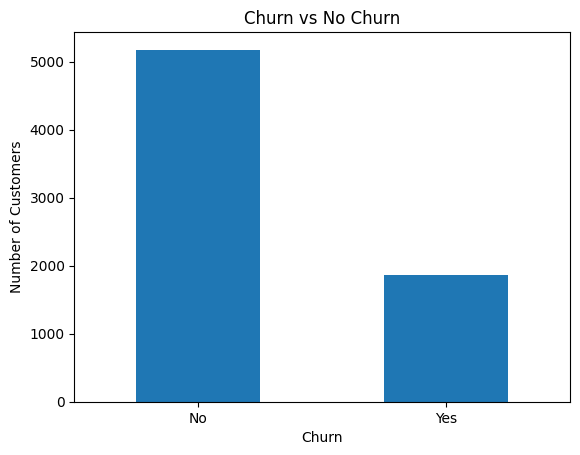

In [66]:
churn_counts = df['Churn'].value_counts()
churn_counts.plot(kind='bar')
plt.title("Churn vs No Churn")
plt.xticks([0,1], ['No', 'Yes'], rotation=0)
plt.ylabel("Number of Customers")
plt.show()

In [71]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7821149751596878
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1048
           1       0.60      0.46      0.52       361

    accuracy                           0.78      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409



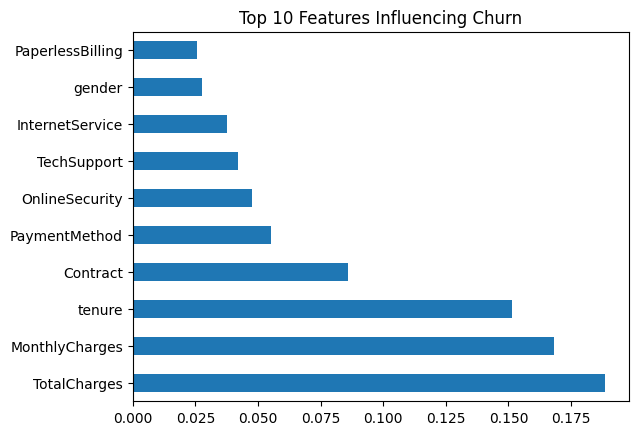

In [72]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Features Influencing Churn")
plt.show()